In [18]:
#Import Libraries Used
import os
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #Display settings for the generated plots

#print(os.path.isfile(r'movies.csv/movies.csv'))

#Reads from the dataset
df = pd.read_csv(r'movies.csv/movies.csv')
df.head() #Top of the dataset

#Checking for null entries
for columns in df.columns:
    missingDataPercent = np.mean(df[columns].isnull())
    print(columns,'has null entries', round(missingDataPercent*100,2), '% of the time')
#Check for the data types in each column
df.dtypes

name has null entries 0.0 % of the time
rating has null entries 1.0 % of the time
genre has null entries 0.0 % of the time
year has null entries 0.0 % of the time
released has null entries 0.03 % of the time
score has null entries 0.04 % of the time
votes has null entries 0.04 % of the time
director has null entries 0.0 % of the time
writer has null entries 0.04 % of the time
star has null entries 0.01 % of the time
country has null entries 0.04 % of the time
budget has null entries 28.31 % of the time
gross has null entries 2.46 % of the time
company has null entries 0.22 % of the time
runtime has null entries 0.05 % of the time


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
#print(np.mean([True,False,False,True,True])*100)
#Remove rows with null entries
df = df.dropna(axis = 0, how = 'any')

for columns in df.columns:
    missingDataPercent = np.mean(df[columns].isnull())
    print(columns,'has null entries', round(missingDataPercent*100,2), '% of the time')

name has null entries 0.0 % of the time
rating has null entries 0.0 % of the time
genre has null entries 0.0 % of the time
year has null entries 0.0 % of the time
released has null entries 0.0 % of the time
score has null entries 0.0 % of the time
votes has null entries 0.0 % of the time
director has null entries 0.0 % of the time
writer has null entries 0.0 % of the time
star has null entries 0.0 % of the time
country has null entries 0.0 % of the time
budget has null entries 0.0 % of the time
gross has null entries 0.0 % of the time
company has null entries 0.0 % of the time
runtime has null entries 0.0 % of the time


In [37]:
#Change data types in budget, votes, and gross columns for better presentation
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [20]:
#Create Year column that matches the year in release date

df['Year Released'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]
#df = df.drop('Year_Released', axis='columns')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [21]:

#pd.set_option('display.max_rows', 100) #Adjust display so that there is no set maximum for the rows

#Sort rows into descending order for the gross values
df = df.sort_values(by = 'gross', inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982


In [64]:
#df.sort_values(by = 'budget', inplace = False, ascending = False)

#Remove company duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

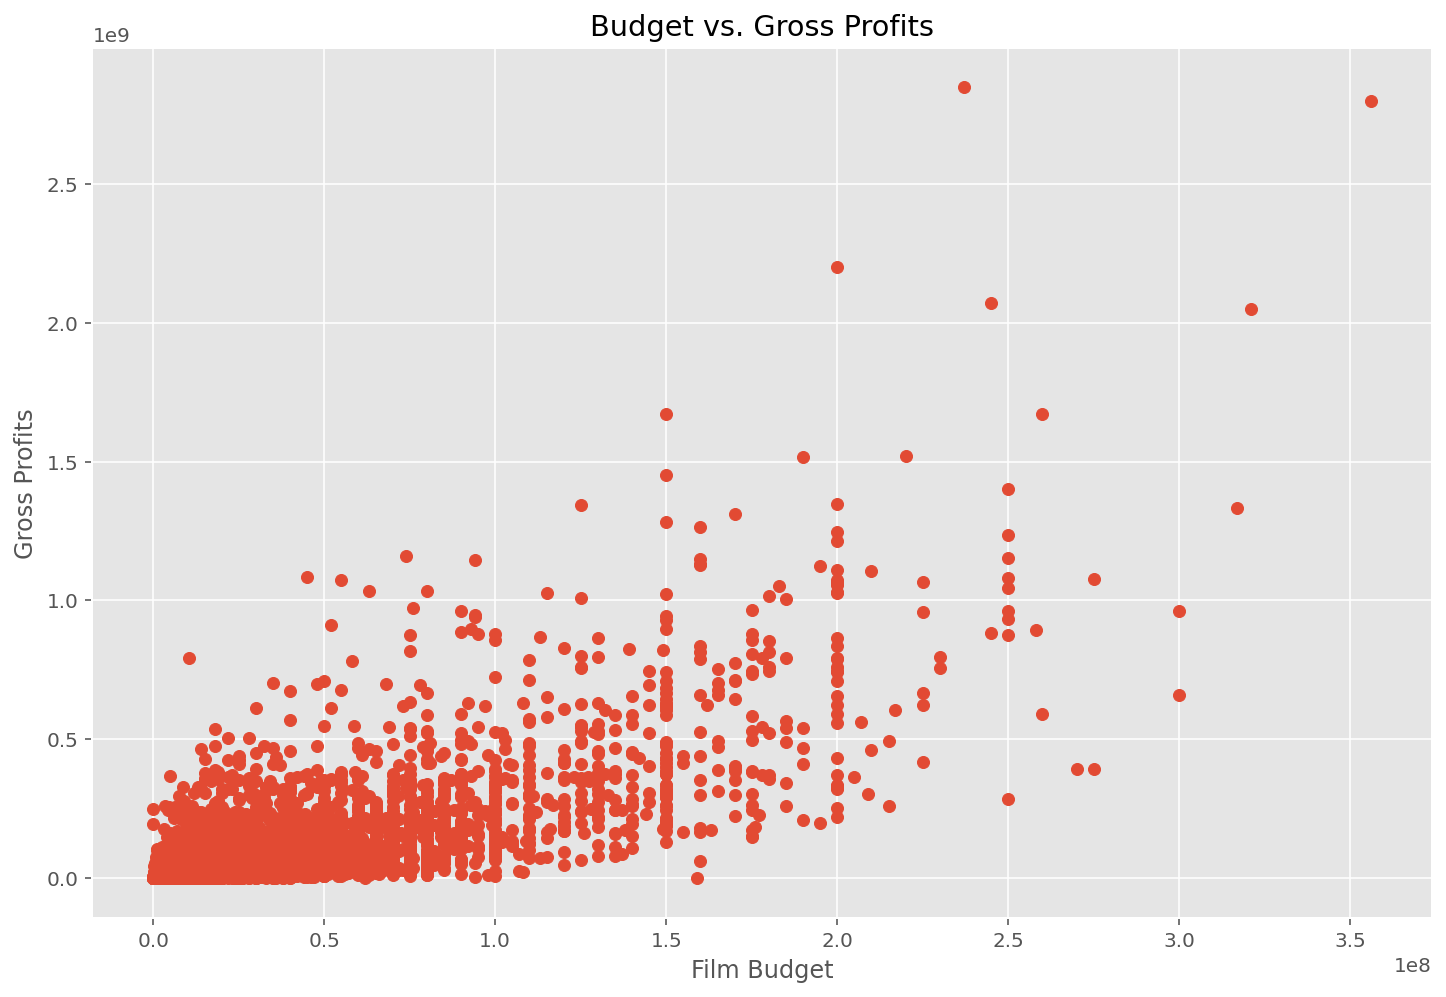

In [67]:
#Correlations to budget

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Profits')
plt.xlabel('Film Budget')
plt.ylabel('Gross Profits')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

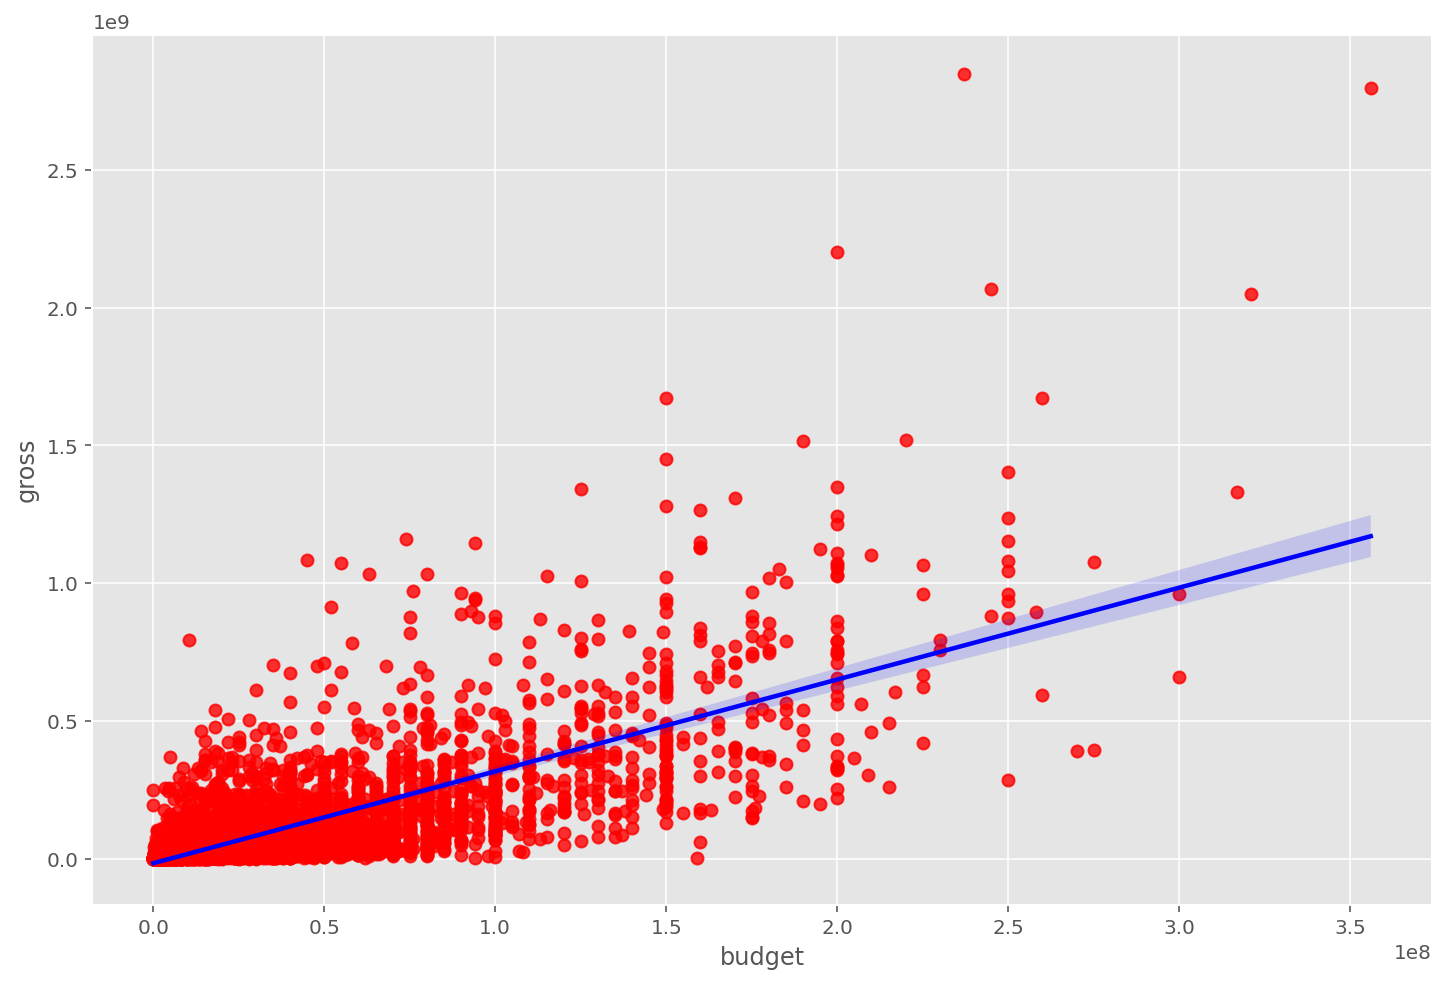

In [76]:
#Plotting a line of regression to model the correlation between gross and budget
sns.regplot(x = 'budget', y='gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

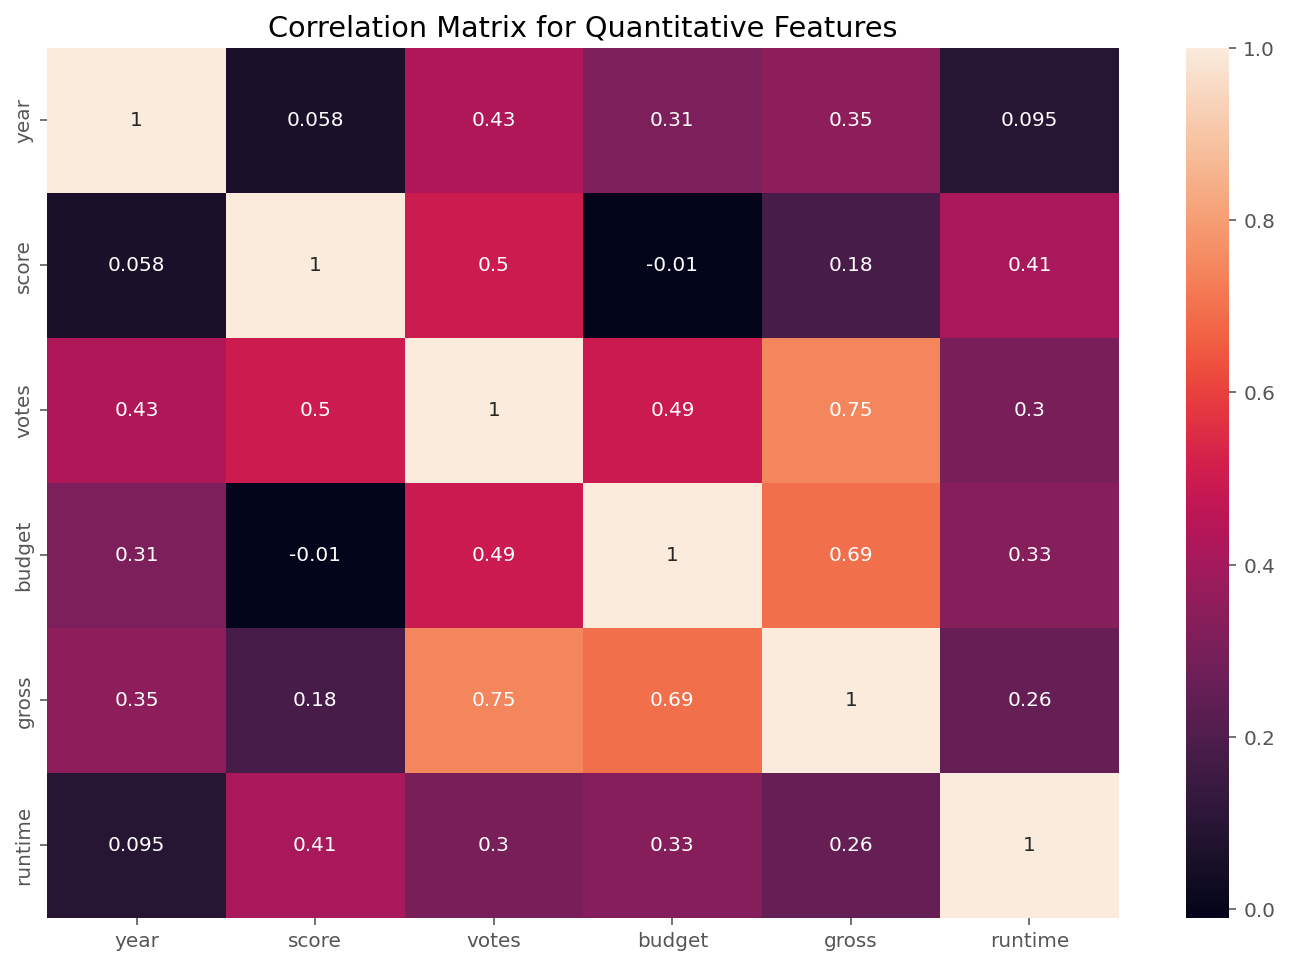

In [80]:
#sns.regplot(x = 'score', y='votes', data = df)
matrix = df.corr(method = "spearman")
sns.heatmap(matrix, annot = True)
plt.title("Correlation Matrix for Quantitative Features")
plt.show()

In [22]:
df_numerized = df
df_numerized.head()

for column in df_numerized.columns:
    if(df_numerized[column].dtype == 'object'):
        df_numerized[column] = df_numerized[column].astype('category')
        df_numerized[column] = df_numerized[column].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year Released
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,38


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


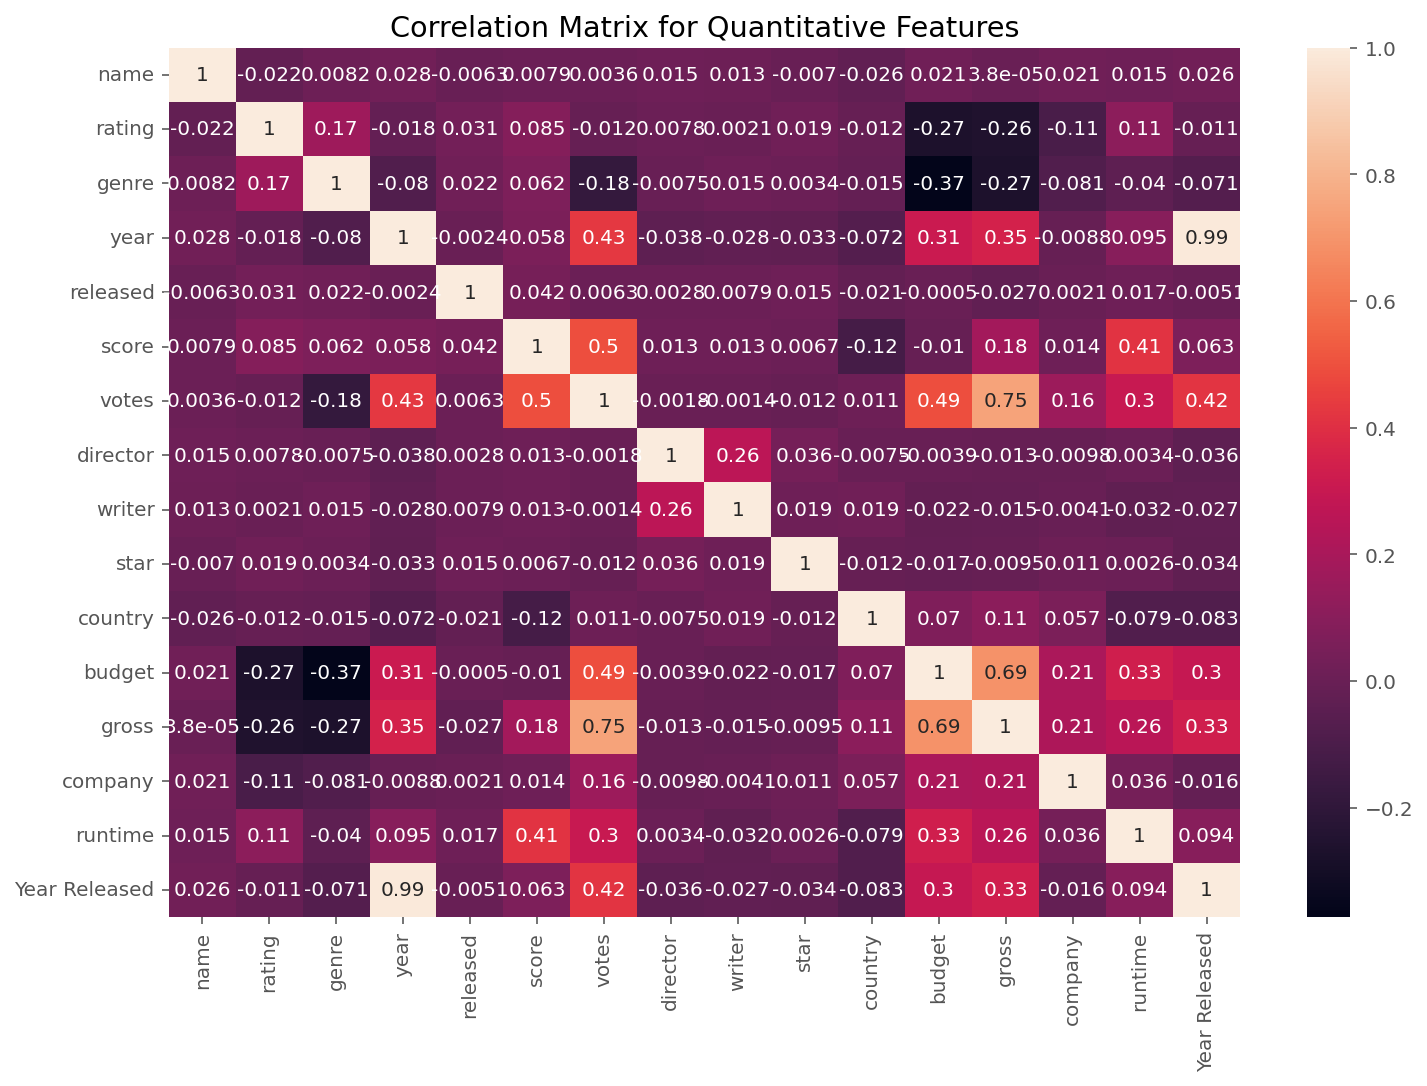

In [23]:
matrix = df_numerized.corr(method = "spearman")
sns.heatmap(matrix, annot = True)
plt.title("Correlation Matrix for Quantitative Features")
plt.show()

In [31]:
corrmat = df_numerized.corr()
corrpairs = corrmat.unstack()
pd.set_option('display.max_rows', None)
sort_pairs = corrpairs.sort_values()
#print(sort_pairs)
high_corr = sort_pairs[(sort_pairs) > 0.4]
print(high_corr)

runtime        score            0.414068
score          runtime          0.414068
budget         votes            0.439675
votes          budget           0.439675
score          votes            0.474256
votes          score            0.474256
               gross            0.614751
gross          votes            0.614751
budget         gross            0.740247
gross          budget           0.740247
Year Released  year             0.990417
year           Year Released    0.990417
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          g